In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV,LassoCV,Lasso
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import dataframe_image as dfi

In [2]:
data=df=pd.read_csv("C:\\Users\\Yacou\\Desktop\\Yacouba_New\\climte\\Data\\Rendements\\okay\\mil_mais.csv")

In [19]:
a=data.describe()
a.to_csv('C:\\Users\\Yacou\\Desktop\\Yacouba_New\\climte\\code\\Crop_yield\\python\\dern\\figure\\table_describe.csv')

In [3]:
len(df.columns)

44

In [4]:
c0=['provinces']
c1=['year', 'Tmin_ERA5', 'ERA5_Pressure',
        'ERA5_wins', 'ARC2_year', 'Best_Temp_Max',
       'Best_Temp',  'Tamsat_Prec', 'chirps_Prec', 'CDD', 'CWD',
       'PRCPTOT', 'R10mm', 'R1mm', 'R20mm', 'R5mm', 'R95pTOT', 'R99pTOT',
       'RX1day', 'RX5day', 'SDII', 'TNn', 'TXn', 'TNx', 'TXx', 'Nino','sahel_rainfal','qbo' ]
c2=['NDVI','ERA5_soil_moisture','AMM',
       'AMO', 'AO', 'EA', 'NAO', 'NTA', 'PDO', 'gmsst',
       'tna', 'tsa']
d2=data[c2]
d3=data[ 'mil']
d4=data['mais']

In [5]:
var='mais'

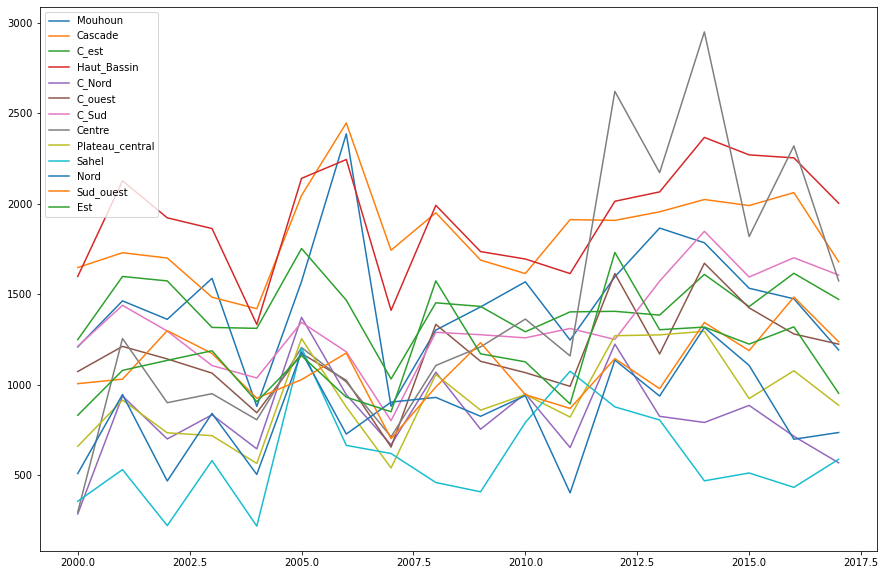

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(15,10))

Mouhoun=df.loc[df['provinces'].isin(['Bale','Banwa','Nayala','Mouhoun'])]
Mouhoun=Mouhoun.groupby(['year']).mean()
y=Mouhoun.index
m1=Mouhoun[var]
plt.plot(y, m1,label='Mouhoun')


Cascade=df.loc[df['provinces'].isin(['Comoe','Leraba'])]
Cascade=Cascade.groupby(['year']).mean()
m2=Cascade[var]
plt.plot(y, m2,label='Cascade')

C_est=df.loc[df['provinces'].isin(['Boulgou','Koulpelogo','Kouritenga'])]
C_est=C_est.groupby(['year']).mean()
m3=C_est[var]
plt.plot(y, m3,label='C_est')

Haut_Bassin=df.loc[df['provinces'].isin(['Tuy','Kenedougou','Houet'])]
Haut_Bassin=Haut_Bassin.groupby(['year']).mean()
m12=Haut_Bassin[var]
plt.plot(y, m12,label='Haut_Bassin')

C_Nord=df.loc[df['provinces'].isin(['Bam','Namentenga','Sanmatenga'])]
C_Nord=C_Nord.groupby(['year']).mean()
m4=C_Nord[var]
plt.plot(y, m4,label='C_Nord')

C_ouest=df.loc[df['provinces'].isin(['Boulkiemde','Sanguie','Sissili','Ziro'])]
C_ouest=C_ouest.groupby(['year']).mean()
m5=C_ouest[var]
plt.plot(y, m5,label='C_ouest')

C_Sud=df.loc[df['provinces'].isin(['Bazega','Nahouri','Zoundweogo'])] 
C_Sud=C_Sud.groupby(['year']).mean()
m6=C_Sud[var]
plt.plot(y, m6,label='C_Sud')

Centre=df.loc[df['provinces'].isin(['Kadiogo'])] 
Centre=Centre.groupby(['year']).mean()
m7=Centre[var]
plt.plot(y, m7,label='Centre')

Plateau_central=df.loc[df['provinces'].isin(['Ganzourgou','Kourweogo','Oubritenga'])]
Plateau_central=Plateau_central.groupby(['year']).mean()
m8=Plateau_central[var]
plt.plot(y, m8,label='Plateau_central')

Sahel=df.loc[df['provinces'].isin(['Oudalan','Seno','Soum','Yagha'])]
Sahel=Sahel.groupby(['year']).mean()
m9=Sahel[var]
plt.plot(y, m9,label='Sahel')

Nord=df.loc[df['provinces'].isin(['Loroum','Passore','Yatenga','Zondoma'])]
Nord=Nord.groupby(['year']).mean()
m10=Nord[var]
plt.plot(y, m10,label='Nord')

Sud_ouest=df.loc[df['provinces'].isin(['Poni','Noumbiel','Ioba','Bougouriba'])]
Sud_ouest=Sud_ouest.groupby(['year']).mean()
m11=Sud_ouest[var]
plt.plot(y, m11,label='Sud_ouest')



Est=df.loc[df['provinces'].isin(['Gnagna','Gourma','Komandjoari','Kompienga','Tapoa'])]
Est=Est.groupby(['year']).mean()
m13=Est[var]
plt.plot(y, m13,label='Est')

plt.legend()
plt.show()
plt.savefig("output.png")

In [9]:
a

In [70]:
dtt=pd.concat([Mouhoun,Cascade,C_est,Haut_Bassin,C_Nord,C_ouest,C_Sud,Centre,Plateau_central,Sahel,Nord,Sud_ouest,Est])

In [71]:
class model:
    
    def __init__(self,df,n,predicteur,var):
        self.df=df
        self.n=n
        self.predicteur=predicteur
        self.var=var
        self.model1=None
        self.model2=None
        self.model3=None
        self.model4=None
        self.X_train=None
        self.X_test=None
        self.y_train=None
        self.y_test =None
        pred=self.df[self.predicteur]
        y=self.df[self.var]
        #dum = pd.get_dummies(self.df[c0],drop_first=True)
        #X=pd.concat([dum,pred],axis=1)
        X=pred
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y,test_size=0.2,random_state=self.n) 

        self.model1 = RidgeCV()
        self.model2 = Lasso(normalize=True, tol=1e-3)
        self.model3 = RandomForestRegressor(n_estimators = 500,max_depth=23)
        self.model4 = DecisionTreeRegressor(max_depth=23) 

        self.model1.fit(self.X_train, self.y_train)
        self.model2.fit(self.X_train, self.y_train)
        self.model3.fit(self.X_train, self.y_train)
        self.model4.fit(self.X_train, self.y_train)

    def prediction(self):
            train_RidgeCV=self.model1.score(self.X_train, self.y_train)
            test_RidgeCV=self.model1.score(self.X_test, self.y_test)

            train_LassoCV=self.model2.score(self.X_train, self.y_train)
            test_LassoCV=self.model2.score(self.X_test, self.y_test)

            train_RandomForest=self.model3.score(self.X_train, self.y_train)
            test_RandomForest=self.model3.score(self.X_test, self.y_test)
 
            train_DecisionTree=self.model4.score(self.X_train, self.y_train)
            test_DecisionTree=self.model4.score(self.X_test, self.y_test)


            data = {'model': ['RandomForest', 'DecisionTree', 'RidgeCV', 'Lasso'],
            'Score_train': [train_RandomForest, train_DecisionTree, train_RidgeCV, train_LassoCV],
            'score_test': [test_RandomForest, test_DecisionTree, test_RidgeCV, test_LassoCV]
              }
            d = pd.DataFrame(data)
            return d
    
    def get_RF(self):
        feat_importances = pd.Series(self.model3.feature_importances_, index=self.X_train.columns)
        feat_importances.nlargest(6).plot(kind='barh')
    
    def get_RidgeCV(self):
        feat_importances = pd.Series(self.model1.coef_, index=self.X_train.columns)
        feat_importances.nlargest(16).plot(kind='barh')
        
    def get_Lasso(self):
        return self.model2       

    def get_dec_tree(self):
        return self.model4



In [78]:
Mouhoun=Centre.reset_index()

Mouhoun = pd.DataFrame(StandardScaler().fit_transform(Mouhoun))
Mouhoun=Mouhoun.rename(columns={0:'year',1: 'Tmin_ERA5', 2: 'ERA5_Pressure', 3:'ERA5_Tmax',
       4:'ERA5_soil_moisture', 5:'ERA5_wins', 6:'ARC2_year', 7:'Best_Temp_Max',
       8:'Best_Temp', 9:'NDVI', 10:'Tamsat_Prec', 11:'chirps_Prec', 12:'CDD', 13:'CWD',
       14:'PRCPTOT', 15:'R10mm', 16:'R1mm', 17:'R20mm', 18:'R5mm', 19:'R95pTOT', 20:'R99pTOT',
       21:'RX1day', 22:'RX5day', 23:'SDII', 24:'TNn', 25:'TXn', 26:'TNx', 27:'TXx', 28:'Nino', 29:'AMM',
       30:'AMO', 31:'AO', 32:'EA', 33:'NAO', 34:'NTA', 35:'PDO', 36:'gmsst', 37:'qbo', 38:'sahel_rainfal',
       39:'tna', 40:'tsa', 41:'mais', 42:'mil'})



In [76]:
dq=model(Mouhoun,3,c1,"mais")

In [77]:
dq.prediction()

,model,Score_train,score_test
0,RandomForest,0.935716,0.480664
1,DecisionTree,1.000000,0.435064
2,RidgeCV,0.999948,0.391819
3,Lasso,0.000000,-0.059252
